# Задание 2

### 1. Одномерная линейная регрессия.
Вывести формулу линейной регрессии для одномерного случая. Дана
выборка $\{x_i,y_i\}_{i=1}^N$, минимизируя среднеквадратичную ошибку определить
коэффициенты линейной регрессии: $a(x)=w_0+w_1x$.

### 2. Оптимальный шаг градиентного спуска. 
Рассмотрим задачу обучения линейной регрессии:

$$
Q(\vec{w})=(X\vec{w}-\vec{y})^T(X\vec{w}-\vec{y}) \to \min_{w},
$$
и будем решать ее с помощью градиентного спуска. Допустим, мы находимся на некоторой итерации $k$, и хотим выполнить очередной шаг:
$$
\vec{w}^{(k)}=\vec{w}^{(k-1)}-\eta \nabla_w Q(\vec{w}^{(k-1)}).
$$
При известных $ \vec{y}, X,\vec{w}^{(k-1)}$, определите длину шага $\eta$, при которой уменьшение значение функционала будет наибольшим, т.е.: 

$$
Q(\vec{w}^{(k-1)}-\eta \nabla_w Q(\vec{w}^{(k-1)})) \to \min_{\eta}.
$$

### 1. Одномерная линейная регрессия
Воспользуемся методом наименьших квадратов. В нашем одномерном случае:

<br>
$Q(w)=\sum^{N}_{i=1} (y_i-x_iw_1^*-w_0^*)^2 \rightarrow \underset{w}{\operatorname{min}}$
<br>

Продифференцируем Q(w) и прировняем частные производные к нулю. 

$$
  \begin{equation*}
  \left\{
  \begin{array}{lr}
  \frac{\partial Q}{\partial w_0} = -2*\sum_{i=1}^N(y_i-w_0-w_1x_i)=0 \\
  \frac{\partial Q}{\partial w_1} = -2*\sum_{i=1}^Nx_i(y_i-w_0-w_1x_i)=0
  \end{array}
  \right.
  \end{equation*}
$$

Из второго уравнения выражаем $w_1^*$ 

$$
w_0\sum_{i=1}^Nx_i+w_1\sum_{i=1}^Nx_i^2=\sum_{i=1}^Nx_iy_i 
$$

Из первого $w_0^*$

$$
Nw_0+w_1\sum_{i=1}^Nx_i=\sum_{i=1}^Ny_i
$$


$$
w_1^*= \frac{\sum_{i=1}^Nx_iy_i - w_0(\sum_{i=1}^Nx_i)}{\sum_{i=1}^Nx_i^2} =< w_0 = \frac{\sum_{i=1}^Ny_i-w_1\sum_{i=1}^Nx_i}{N} >=  \frac{N\sum_{i=1}^Nx_iy_i-\sum_{i=1}^Nx_i\sum_{i=1}^Ny_i}{N\sum_{i=1}^Nx_i^2-(\sum_{i=1}^Nx_i)^2}=\frac{\sum_{i=1}^N(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^N(x_i-\overline{x})^2}
$$

<br>

$$
w_0^*=\overline{y}-w_1^*\overline{x}
$$

### 2. Оптимальный шаг градиентного спуска
Рассмотрим следующую задачу 
$$
h(\eta)=Q(\vec{w}^{(k-1)}-\eta \nabla_w Q(\vec{w}^{(k-1)})) \to \min_{\eta}.
$$


Наша функция квадратична, значит ряд Тейлора для неё будет таким 


$$
  h(\eta)=Q(\vec{w}^{(k-1)})-\eta\nabla_w Q(\vec{w}^{(k-1)})\nabla_w Q(\vec{w}^{(k-1)})+0.5\eta^2(\nabla_w Q(\vec{w}^{(k-1)}))^T\nabla^2_w Q(\vec{w}^{(k-1)})\nabla_w Q(\vec{w}^{(k-1)})
$$



Теперь рассматриваем задачу оптимизации для данной функции, возьмём её производную и приравняем к нулю

$$
  \frac{\partial h(\eta)}{\partial \eta}=-\nabla_w Q(\vec{w}^{(k-1)})\nabla_w Q(\vec{w}^{(k-1)})+\eta(\nabla_w Q(\vec{w}^{(k-1)}))^T\nabla^2_w Q(\vec{w}^{(k-1)})\nabla_w Q(\vec{w}^{(k-1)})=0
$$

Теперь выразим оптимальную длину шага
$$
  \eta = \frac{\nabla_w Q(\vec{w}^{(k-1)})*\nabla_w Q(\vec{w}^{(k-1)})}{(\nabla_w Q(\vec{w}^{(k-1)}))^T (\nabla^2_w Q(\vec{w}^{(k-1)})) (\nabla_w Q(\vec{w}^{(k-1)})}
$$

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV


### 3. Стохастический градиентный спуск 
Напишите функцию стохастического градиентного спуска. 
Функция использует для оценки градиента всего функционала ошибки значение градиента, вычисленного по подвыборке размера batch_size=10. Визуализируйте траекторию, длина шага $\eta=1$.

In [26]:
np.random.seed(17)
n_features = 2
n_objects = 300
w_true = np.array([1.0,1.0])
X = np.random.uniform(-5,5, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0,1, (n_objects))

In [27]:
def stoch_grad_descent(X, y, w_0,step_size, num_steps):
    w = w_0.copy()
    batch_size=10
    index = np.arange(X.shape[0])
    np.random.shuffle(index)
    w_list=[]
    for i in range(num_steps):
        w_list.append(w)
        lolo = np.random.choice(index,10)    
        w =w - 2 * step_size * np.dot(X[lolo].T, np.dot(X[lolo], w) - y[lolo])/batch_size
    return w_list

In [28]:
num_steps = 20
step_size = 1e-2
w_0 = np.array([0,0])
w_list=grad_descent(X, Y, w_0,step_size, num_steps)
w_list = np.array(w_list)
print(w_list)

[[0.         0.        ]
 [0.18651672 0.20890511]
 [0.36178631 0.31312697]
 [0.51099902 0.47829443]
 [0.62417606 0.57244994]
 [0.67824587 0.65301844]
 [0.7228387  0.72055374]
 [0.78685141 0.74623696]
 [0.83325505 0.77753959]
 [0.84740099 0.80734375]
 [0.90459023 0.8154992 ]
 [0.89511867 0.81756012]
 [0.9098626  0.84028838]
 [0.8947074  0.85292428]
 [0.87670694 0.87558202]
 [0.87378105 0.91284343]
 [0.93127886 0.95205623]
 [0.97568584 0.97680442]
 [0.99164518 0.99138592]
 [1.03221797 0.98667796]]


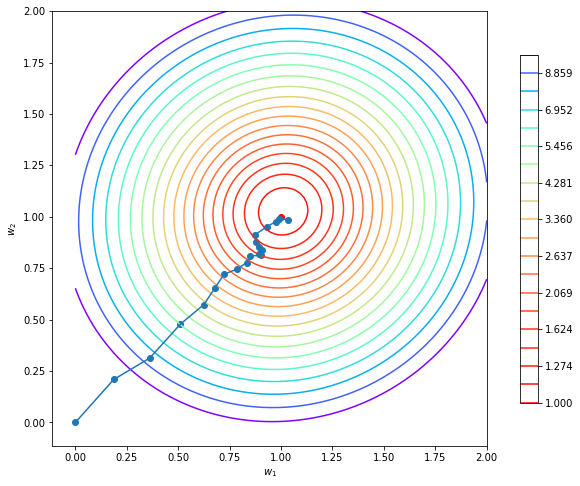

In [29]:
# compute level set
A, B = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(12, 8))
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

### 4. Линейная регрессия на данных. Оценка важности признаков.  

In [14]:
from sklearn.datasets import load_boston
data = load_boston()
feature_names = data.feature_names
print(feature_names)
X = data.data
y = data.target
N, d = X.shape
print(N, d)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
506 13


#### 4.1 Напишите функцию, которая вычисляет ошибку RMSE (root mean square error):
$$ RMSE(a,\mathbb X)=\sqrt{\frac{\sum_{i=1}^{N}(a(x_i)-y_i)^2}{N}}.$$


In [15]:
def RMSE(a,X,y):
    return np.sqrt((np.sum(a(X)-y)**2)/X.shape[0])

Разбейте выборку на обучающую и тестовую в соотношении 7:3. Проведите стандартизацию признаков, постройте линейную регресcию и ответьте на следующие вопросы. 
#### 4.2. Какова ошибка RMSE  линейной регрессии на обучающей  выборке?

#### 4.3. Какова ошибка RMSE линейной регрессии на тестовой выборке?

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
lr = LinearRegression()

lr.fit(X_train,y_train)

print("Train error is ",RMSE(lr.predict,X_train,y_train))
print("Test error is ",RMSE(lr.predict,X_test,y_test))

Train error is  4.3052009170886875e-14
Test error is  1.6637063044302034


####  4.4. Распределение ошибок на обучающей выборке. 
Посчитайте отклонение на каждом обучающем объекте: 
$$\delta^{j}_{train}=y_{pred}^{j}-y_{train}^{j},$$
и постройте распределение этих отклонений. Какой статистике подчиняется полученное распределение?

Text(0, 0.5, 'Number')

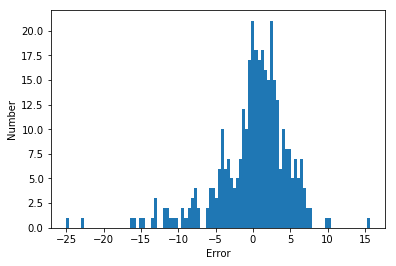

In [22]:
result = lr.predict(X_train) - y_train
k = plt.hist(result,bins=100)
plt.xlabel("Error")
plt.ylabel("Number")

In [23]:
'''Распределение похоже на распределение Стьюдента или логонормальное распределение'''

'Распределение похоже на распределение Стьюдента или логонормальное распределение'


#### 4.5. Постройте диаграмму важности признаков. 
Используйте plt.bar, отсортируйте признаки по важности (модуль соответствующего коэффициента в линейной регрессии) и постройте диаграмму.  Какой признак наиболее важный?

Text(0, 0.5, 'Size of coefficient')

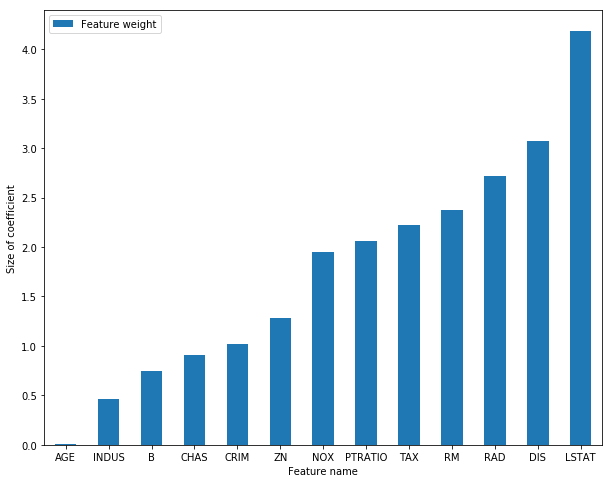

In [34]:
w = lr.coef_
plt.rcParams["figure.figsize"] = (10, 8) 
w = pd.DataFrame({'Feature name':feature_names,'Feature weight':abs(w)},columns = ['Feature name','Feature weight'])
w = w.sort_values(by = ['Feature weight'], axis=0)

ax = w.plot.bar(x='Feature name', y='Feature weight', rot=0)
plt.ylabel('Size of coefficient')

In [88]:
'''LSTAT - наиболее важный'''

'LSTAT - наиболее важный'

### 5. Отбор признаков в Lasso регрессии. 
Рассмотрим Lasso регрессию с различным параметром регуляризации $\alpha \in [10^{-3},10^3]$. Посмотрите, какое количество коэффициентов зануляется в линейной модели. Воспользуйтесь кроссвалидацией (например, ShuffleSplit), чтобы построить несколько алгоритмов для одного и того же значения  $\alpha$, а затем взять среднее число ненулевых коэффициентов по этим алгоритмам.  Постройте график зависимости (логарифмический масштаб по оси абсцис) среднего числа ненулевых коэффициентов от коэффицента регуляризации $\alpha$.

P.S. Обратите внимание на необходимость стандартизации при каждом разбиении выборки.  

In [35]:
alphas = np.logspace(-3, 3,20)

scaler = StandardScaler()

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)
counts = []
for al in alphas:
    lasso_model = Lasso(alpha = al)
    num_of_zeroes = []
    for train, test in cv.split(X):
        scaler.fit(X[train])
        X_tr = scaler.transform(X[train])
        X_te = scaler.transform(X[test])
        lasso_model.fit(X_tr,y[train])
        num_of_zeroes.append(np.count_nonzero(lasso_model.coef_))
    counts.append(np.mean(num_of_zeroes))

Text(0, 0.5, 'count of non_zero')

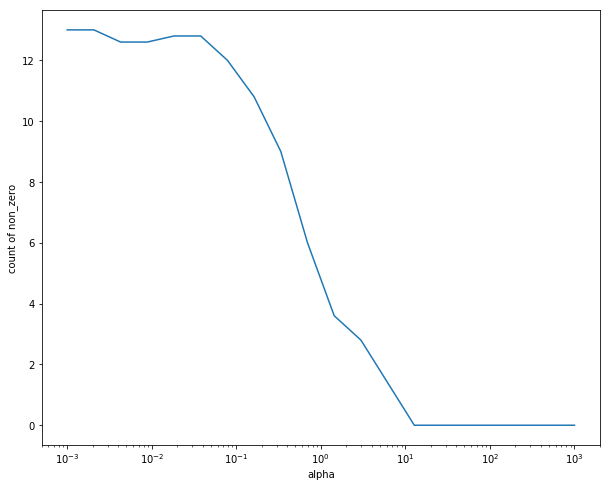

In [36]:
plt.plot(alphas, counts)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("count of non_zero")

### 6. Подбор параметров. 
#### 6.1. С помощью GridSearch определите параметры регуляризации для Ridge и Лассо моделей. 

In [40]:
alphas = np.logspace(-3, 3, 20)

searcher_Lasso = GridSearchCV(Lasso(), [{"alpha": alphas}], cv=10)
searcher_Lasso.fit(X_train, y_train)

searcher_Ridge = GridSearchCV(Ridge(), [{"alpha": alphas}], cv=10)
searcher_Ridge.fit(X_train, y_train)

print("Best for Lasso is ",searcher_Lasso.best_params_['alpha'])
print("Best for Ridge is " ,searcher_Ridge.best_params_['alpha'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best for Lasso is  0.018329807108324356
Best for Ridge is  6.158482110660261


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### 6.2. Постройте модели с найденными наилучшими параметрами регуляризации на обучающей выборке из пункта 4. Какова ошибка RMSE на обучающей выборке и тестовой?

In [41]:
lasso_model = Lasso(alpha = searcher_Lasso.best_params_['alpha'])
ridge_model = Ridge(alpha = searcher_Ridge.best_params_['alpha'])

ridge_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)

print("For Lasso")
print("Train ",RMSE(lasso_model.predict,X_train,y_train))
print("Test ",RMSE(lasso_model.predict,X_test,y_test))

print("For Ridge")
print("Train ", RMSE(ridge_model.predict,X_train,y_train))
print("Test ", RMSE(ridge_model.predict,X_test,y_test))

For Lasso
Train  6.117917092704978e-14
Test  1.673522036597916
For Ridge
Train  6.53333121628371e-14
Test  1.5633730128688845
